# MA(q) Parameter Estimation

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

Here the $\vartheta_i$ are estimated given an $MA(q)$ time series. 

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats
from lib.plot_config import DataPlotType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1

## Simulations

In [3]:
nsample = 1000

θ1 = numpy.array([0.2])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([0.2, 0.4])
ma2 = arima.maq(θ2, nsample)

θ3 = numpy.array([0.2, 0.1, 0.4])
ma3 = arima.maq(θ3, nsample)

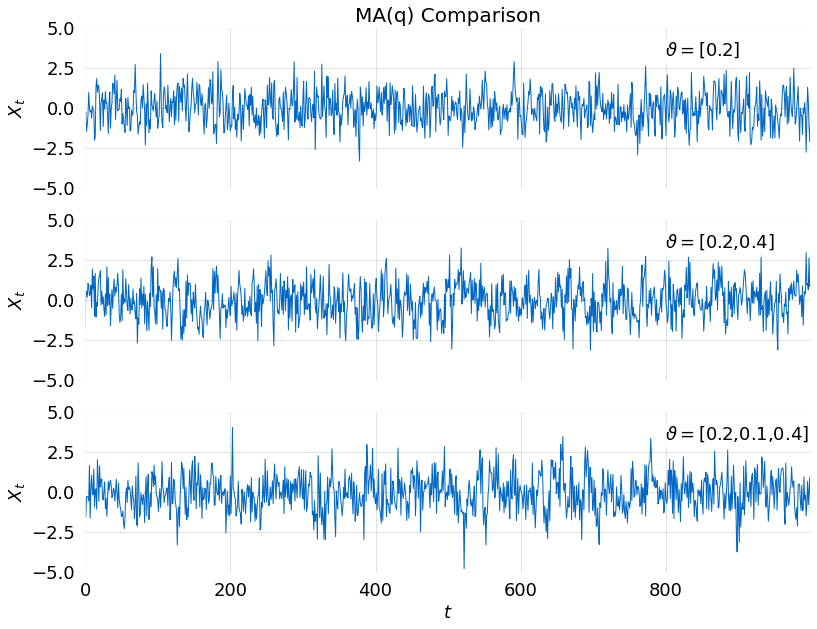

In [4]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = [ma1, ma2, ma3]
plots.stack(samples, ylim=[-5.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = 0.2$

In [5]:
results = arima.ma_estimate(ma1, 1)
results.polynomial_ma, results.bse

(array([1.        , 0.22011973]), array([0.03887839, 0.0297989 , 0.04796661]))

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1425.796
Date:                Sun, 10 Apr 2022   AIC                           2857.591
Time:                        12:43:31   BIC                           2872.314
Sample:                             0   HQIC                          2863.187
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.039      0.106      0.916      -0.072       0.080
ma.L1          0.2201      0.030      7.387      0.000       0.162       0.279
sigma2         1.0137      0.048     21.134      0.000       0.920       1.108
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.92   Prob(JB):                         0.31
Heteroskedasticity (H):               1.01   Skew:                             0.05
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(2)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = [0.2, 0.4]$

In [7]:
results = arima.ma_estimate(ma2, 2)
results.polynomial_ma, results.bse

(array([1.        , 0.18745381, 0.40586661]),
 array([0.05155715, 0.03014266, 0.02964842, 0.0485577 ]))

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1441.084
Date:                Sun, 10 Apr 2022   AIC                           2890.168
Time:                        12:43:31   BIC                           2909.799
Sample:                             0   HQIC                          2897.629
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0358      0.052     -0.693      0.488      -0.137       0.065
ma.L1          0.1875      0.030      6.219      0.000       0.128       0.247
ma.L2          0.4059      0.030     13.689      0.000       0.348       0.464
sigma2         1.0449      0.049     21.518      0.000       0.950       1.140
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.91
Prob(Q):                              1.00   Prob(JB):                         0.63
Heteroskedasticity (H):               1.04   Skew:                             0.02
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(3)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = [0.2, 0.1, 0.4]$

In [9]:
results = arima.ma_estimate(ma3, 3)
results.polynomial_ma, results.bse

(array([1.        , 0.17525597, 0.12668516, 0.43785558]),
 array([0.05591379, 0.02846261, 0.02914466, 0.02964043, 0.04436407]))

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1434.339
Date:                Sun, 10 Apr 2022   AIC                           2878.678
Time:                        12:43:31   BIC                           2903.217
Sample:                             0   HQIC                          2888.005
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0667      0.056     -1.192      0.233      -0.176       0.043
ma.L1          0.1753      0.028      6.157      0.000       0.119       0.231
ma.L2          0.1267      0.029      4.347      0.000       0.070       0.184
ma.L3          0.4379      0.030     14.772      0.000       0.380       0.496
sigma2         1.0306      0.044     23.230      0.000       0.944       1.118
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.54   Prob(JB):                         0.46
Heteroskedasticity (H):               1.08   Skew:                            -0.01
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""